* Filter by 2020-2022
* Drop rows with invalid coordinates
* Create two datasets: `Human&Animal waste cleaning request` and `Encampment request`

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
# read in dataset
df = pd.read_csv('311_Cases_1121.csv')
df.shape

(5790799, 47)

In [ ]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Street', 'Supervisor District', 'Neighborhood',
       'Police District', 'Latitude', 'Longitude', 'Point', 'Source',
       'Media URL', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'DELETE - Supervisor Districts', 'DELETE - Fire Prevention Districts',
       'DELETE - Current Police Districts', 'DELETE - Zip Codes',
       'DELETE - Police Districts', 'DELETE - Neighborhoods',
       'DELETE - Neighborhoods_from_fyvs_ahh9', 'DELETE - 2017 Fix It Zones',
       'DELETE - SF Find Neighborhoods',
       'Civic Center Harm Reduction Project Boundary',
       'DELETE - Current Supervisor Districts',
       'Fix It Zones as of 2017-11-06 ', 'Invest In Neighborhoods (IIN) Areas',
       'DELETE - HSOC Zones', 'Fix It Zones as of 2018-02-07',
    

In [ ]:
# keep columns for use
df = df[['CaseID','Opened','Category','Request Type','Request Details','Latitude', 'Longitude']]
df.shape

(5790799, 7)

In [ ]:
df.isna().sum()

CaseID                 0
Opened                 0
Category               0
Request Type           0
Request Details    87316
Latitude               0
Longitude              0
dtype: int64

## Filter by Year

In [ ]:
# create 'Opened_year'
df['Opened_year'] = df['Opened'].str[6:10]
df['Opened_year'].max()

'2022'

In [ ]:
# get only 2020-2022 data
df_subset = df[df['Opened_year'].isin(['2020','2021','2022'])]
df_subset.shape

(1861740, 8)

## Clean Coordinates

In [ ]:
# check missing values in coordinates
df_subset.isna().sum()

CaseID                 0
Opened                 0
Category               0
Request Type           0
Request Details    25908
Latitude               0
Longitude              0
Opened_year            0
dtype: int64

* No missing coordinates in this subset

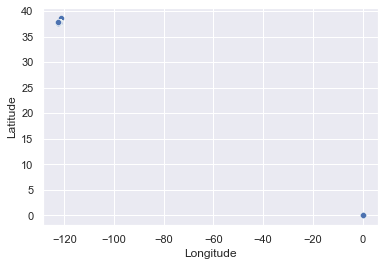

In [ ]:
# check outliers in coordinates
sns.scatterplot(x=df_subset['Longitude'], y=df_subset['Latitude'], data=df_subset)
plt.show()

* There seems to be a outlier in this subset

**Drop rows with 0 Latitude or 0 Longitude**

In [ ]:
# drop rows with 0 Latitude or 0 Longitude
index = df_subset[ (df_subset['Longitude']==0) | (df_subset['Latitude']==0) ].index
df_subset.drop(index, inplace=True)

C:\Users\y25n_\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


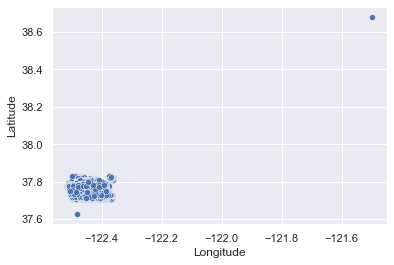

In [ ]:
# check outliers in coordinates
sns.scatterplot(x=df_subset['Longitude'], y=df_subset['Latitude'], data=df_subset)
plt.show()

**Drop rows with Coordinates outside Range**

In [ ]:
# drop rows outside Latitude 37.708448 ~ 37.811151
lat_index = df_subset[ (df_subset['Latitude'] < 37.708448) | (df_subset['Latitude'] > 37.811151) ].index
df_subset.drop(lat_index, inplace=True)

C:\Users\y25n_\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# drop rows outside Longitude -122.514731 ~ -122.357476
long_index = df_subset[ (df_subset['Longitude'] < -122.514731) | (df_subset['Longitude'] > -122.357476) ].index
df_subset.drop(long_index, inplace=True)

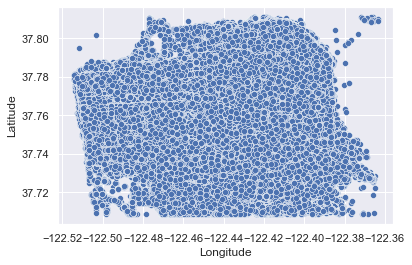

In [ ]:
# check outliers in coordinates
sns.scatterplot(x=df_subset['Longitude'], y=df_subset['Latitude'], data=df_subset)
plt.show()

In [ ]:
# check all coordinates are within range
print(df_subset['Longitude'].min(), df_subset['Longitude'].max())
print(df_subset['Latitude'].min(), df_subset['Latitude'].max())

-122.51443509 -122.363426208496
37.7084481 37.8111503


## Create Cleaning Request Dataset

In [ ]:
# Category = Street and Sidewalk Cleaning
df_cleaning = df_subset[df_subset['Category']=='Street and Sidewalk Cleaning']

In [ ]:
# Request type = Human or Animal Waste
df_cleaning = df_cleaning[df_cleaning['Request Type']=='Human or Animal Waste']

In [ ]:
df_cleaning.shape

(89367, 8)

In [ ]:
#df_cleaning.to_csv('Cleaning_request_dataset.csv', index=False)

## Create Encampment Dataset

In [ ]:
# Category = Encampments
df_encamp = df_subset[df_subset['Category']=='Encampments']

In [ ]:
df_encamp.shape

(99002, 8)

In [ ]:
#df_encamp.to_csv('Encampments_dataset.csv', index=False)